In [1]:
import sys
import os
sys.path.insert(0, os.getcwd()+"/Utils")
import PolyTurk as pt
TRIAL_ID = 5
MASK_PATH = '/home/andrew/ImageSegmentation/Training/Trial'+str(TRIAL_ID)+'/masks/'
IMG_PATH = '/home/andrew/ImageSegmentation/Training/Raw_Images_1024/'

trial_inputs = {
    'TRIAL_ID': TRIAL_ID,
    'MASK_PATH': MASK_PATH,
    'IMG_PATH': IMG_PATH
}

## Initialize Turk object

In [2]:
turk = pt.Turk(trial_inputs)

Number of HITs: 59
Reviewable Assignments: 99


In [3]:
trial_data = turk.getTaskData()

/home/andrew/ImageSegmentation/Utils/PolyTurk.py:106: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 106 of the file /home/andrew/ImageSegmentation/Utils/PolyTurk.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(qhtml)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## Preview Results

In [11]:
import pandas as pd
from IPython.display import HTML
from PIL import Image
from io import BytesIO
import base64

pd.set_option('display.max_colwidth', -1)

def get_thumbnail(paths):
    bg = Image.open(paths[0])
    fg = Image.open(paths[1])
    bg.paste(fg, (0, 0), bg)
    bg.thumbnail((150, 150), Image.LANCZOS)
    return bg

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

df = pd.DataFrame(trial_data)

df=df.loc[df['Score']>0]
import qgrid
qgrid_widget = qgrid.show_grid(df, show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

,AssignmentID,Preview,Score,Approved
0,3PXX5PX6LXYJ57AMU9UGYTEDS4IABG,,10,False
1,304SM51WA34N53WGB9G7JT8JE9GSBJ,,10,False
2,3K5TEWLKGVBDK3RQBEDTG3W3842IVX,,10,False
3,3LPW2N6LKT21V07BZ4KUV8QFPBOU5B,,10,False
5,3TOK3KHVJTIL5Z1XRBNIUMCMYVE7O9,,10,False
6,3PWWM24LHSYBY6HBEIHR195E8BI28H,,10,False
7,3XC1O3LBOSM0XCV7RMAR710ASNYLTG,,10,False
8,3TXMY6UCAEOU2S99X5NXZDZ0E7SCQK,,10,False
9,36H9ULYP62UKJHP6THTPAI8HXQGFJX,,10,False
10,3TPWUS5F891ZMP5V9EM3R2HM297WC8,,10,False

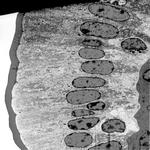
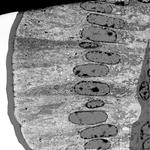
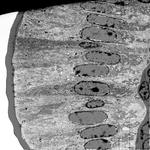
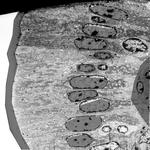
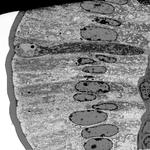
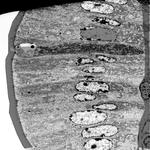
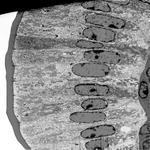
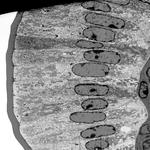
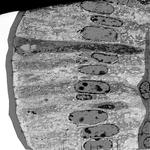
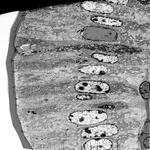
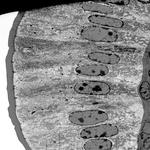
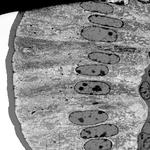
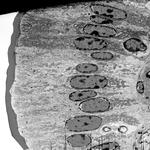
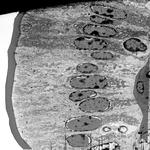
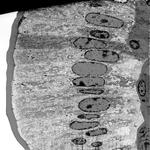
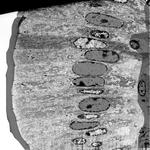
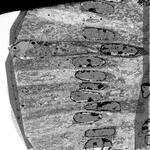
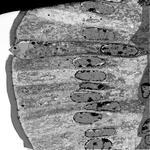
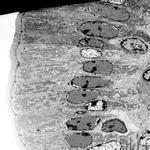
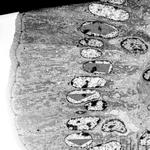
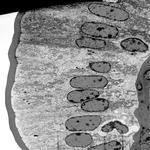
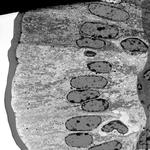
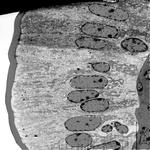
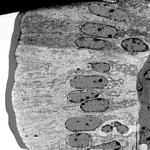
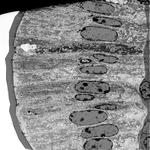
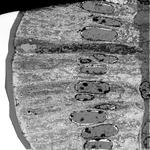
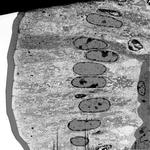
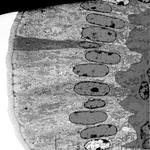
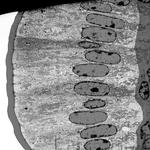
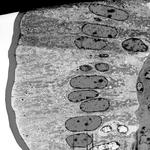
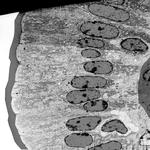
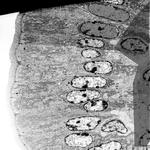
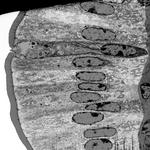
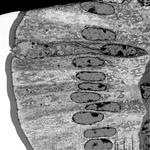
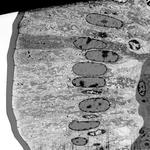
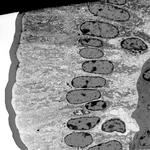
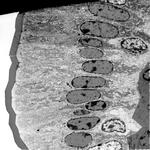
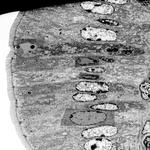
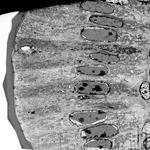
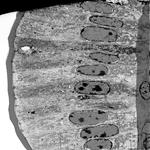
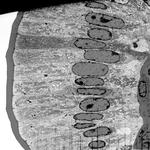
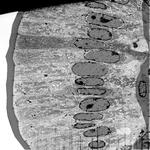
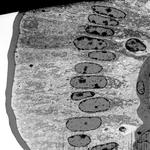
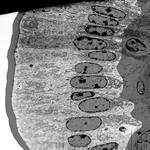
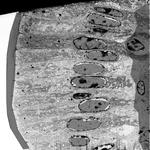
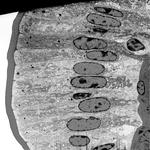
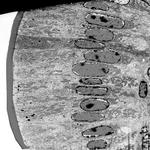
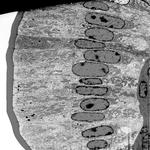
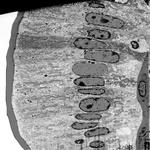
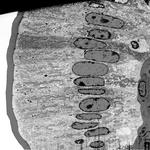
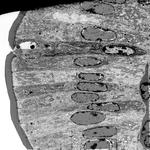
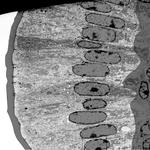
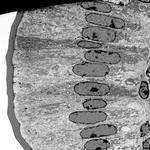
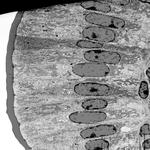
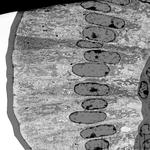
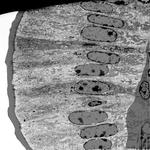
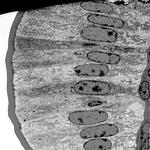
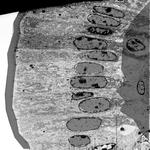
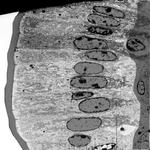
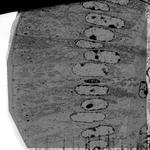
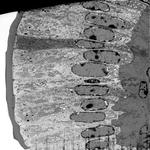
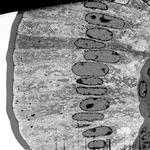
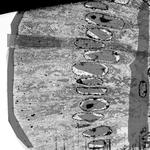
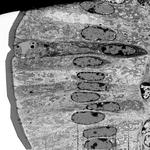
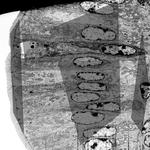
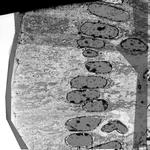
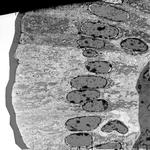
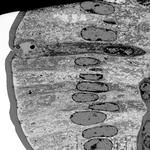
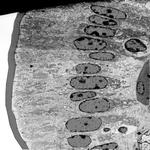
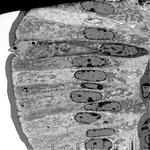
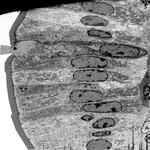
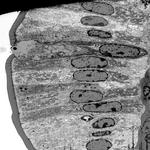
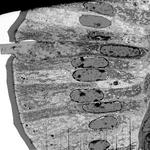
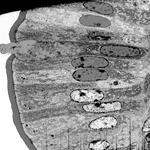
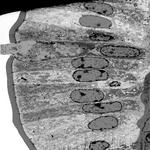
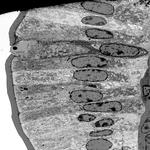
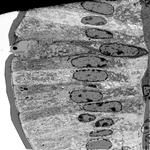
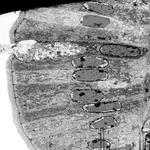
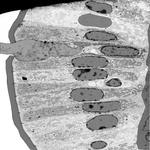
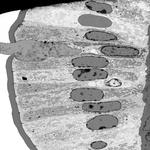
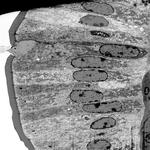
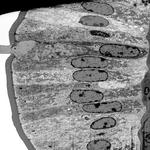
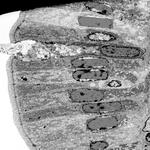
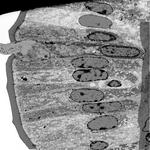
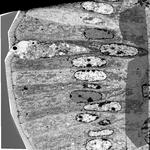
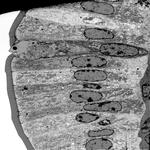

In [12]:
df['URLs'] = df[['Image_Path', 'Mask_Path']].values.tolist()
df['Preview'] = df.URLs.map(lambda f: get_thumbnail(f))

HTML(df[['AssignmentID', 'Preview','Score','Approved']].to_html(formatters={'Preview': image_formatter}, escape=False))